<a href="https://colab.research.google.com/github/daviferrarez1999/projeto3_bairesDev_DIO/blob/main/projeto3_BairesDev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix
)

In [46]:
def especificidade(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  vn = cm[0, 0]
  fp = cm[0, 1]
  calc_especificidade = vn / (vn + fp) if (vn + fp) > 0 else 0
  return calc_especificidade

In [47]:
def plot_matriz_confusao(y_true, y_pred, classes):
  cm = confusion_matrix(y_true, y_pred)
  cm_normalizado = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_dataframe = pd.DataFrame(cm_normalizado, index=classes, columns=classes)

  plt.figure(figsize=(8, 8))
  sns.heatmap(cm_dataframe, annot=True, cmap='Blues', fmt='.2f')
  plt.title('Matriz de confusão normalizada')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.tight_layout()
  plt.show()

In [52]:
def plot_curva_roc(y_true, y_scores):
  falso_positivo, verdadeiro_positivo, _ = roc_curve(y_true, y_scores)
  roc_auc = auc(falso_positivo, verdadeiro_positivo)

  plt.figure(figsize=(8, 8))
  plt.plot(falso_positivo, verdadeiro_positivo, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.title('Curva ROC')
  plt.ylabel('Taxa de falsos positivos')
  plt.xlabel('Taxa de verdadeiros positivos')
  plt.legend(loc='lower right')
  plt.tight_layout()
  plt.show()

In [53]:
def avalia_metrica_separada(nome, valor):
  print(f"{nome}: {valor:.2f}")

In [54]:
def avalia_classificacao(y_true, y_pred, y_scores, classes):
  print("Métricas de classificação: ")
  acuracia = accuracy_score(y_true, y_pred)
  precisao = precision_score(y_true, y_pred, average='binary')
  sensibilidade = recall_score(y_true, y_pred, average='binary')
  calc_especificidade = especificidade(y_true, y_pred)
  f1 = f1_score(y_true, y_pred, average='binary')

  avalia_metrica_separada("Acurácia", acuracia)
  avalia_metrica_separada("Precisão", precisao)
  avalia_metrica_separada("Sensibilidade", sensibilidade)
  avalia_metrica_separada("Especificidade", calc_especificidade)
  avalia_metrica_separada("F1-Score", f1)

  print("\nMatriz de confusão: ")
  print(confusion_matrix(y_true, y_pred))

  plot_matriz_confusao(y_true, y_pred, classes)
  plot_curva_roc(y_true, y_scores)

Métricas de classificação: 
Acurácia: 0.86
Precisão: 0.75
Sensibilidade: 1.00
Especificidade: 0.75
F1-Score: 0.86

Matriz de confusão: 
[[3 1]
 [0 3]]


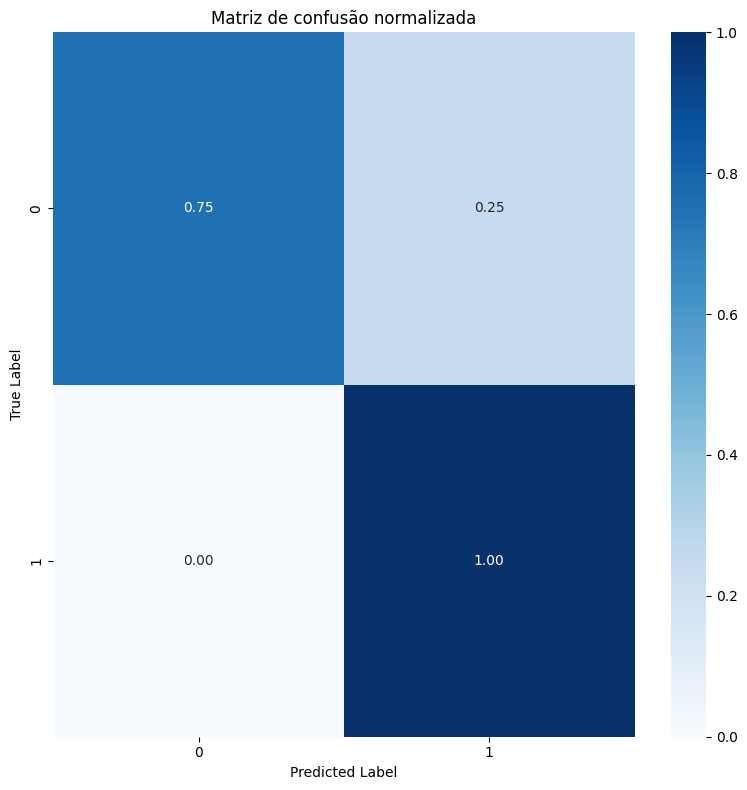

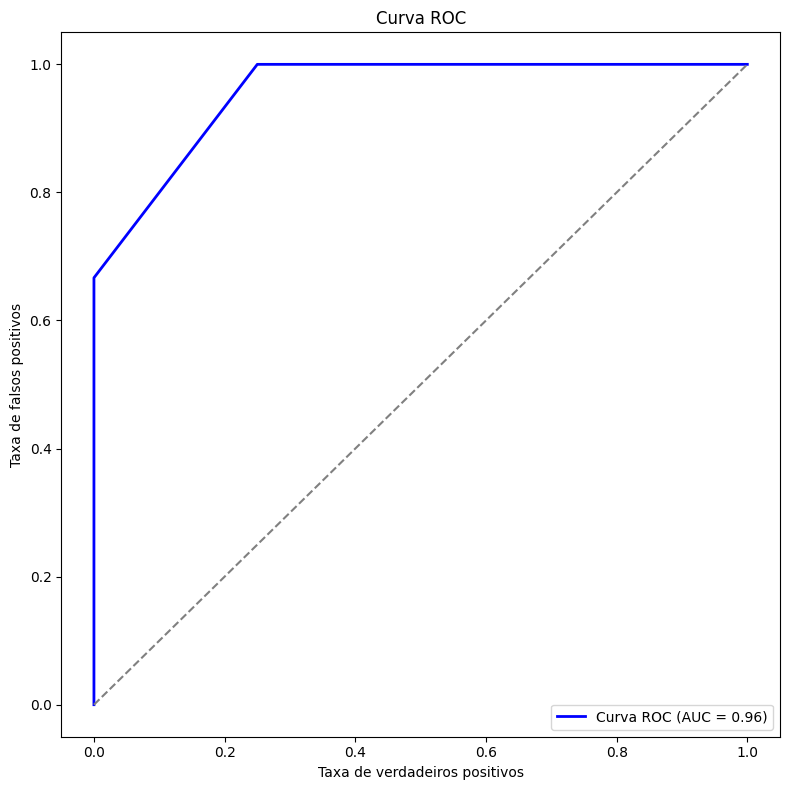

In [69]:
if __name__ == "__main__":
  y_true_classificacao = [0, 1, 0, 0, 1, 0, 1]
  y_pred_classificacao = [0, 1, 0, 1, 1, 0, 1]
  y_scores_classificacao = [0.2, 0.5, 0.4, 0.3, 0.8, 0.5, 0.7]
  classes = [0, 1]

  avalia_classificacao(y_true_classificacao, y_pred_classificacao, y_scores_classificacao, classes)